In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
events_data = pd.read_csv('1.10_events_train.csv')

In [3]:
submissions_data = pd.read_csv('1.10_submissions_data_train.csv')

In [4]:
submissions_data.shape

(509104, 4)

In [5]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [6]:
events_data.shape

(3480703, 4)

In [7]:
events_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [8]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [9]:
events_data['day'] = events_data.date.dt.date

In [10]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')

In [11]:
submissions_data['day'] = submissions_data.date.dt.date

In [12]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [13]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


<AxesSubplot:xlabel='day'>

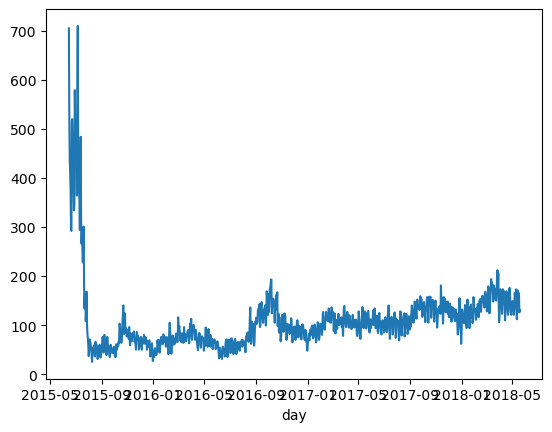

In [14]:
events_data.groupby('day') \
    .user_id.nunique().plot()

In [15]:
sns.set(rc={'figure.figsize': (9, 6)})

<AxesSubplot:xlabel='day'>

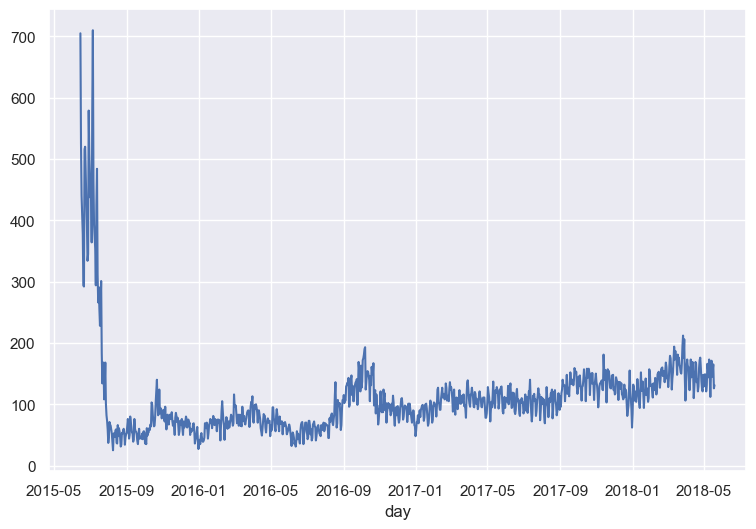

In [16]:
events_data.groupby('day') \
    .user_id.nunique().plot()

In [81]:
users_events_data = events_data.pivot_table(index='user_id', columns='action',
                        values='step_id', aggfunc='count',
                        fill_value=0).reset_index()

In [82]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [18]:
user_scores = submissions_data.pivot_table(index='user_id', columns='submission_status',
                        values='step_id', aggfunc='count',
                        fill_value=0).reset_index()

In [19]:
user_scores.wrong.mean()

28.81277665995976

In [20]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [21]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [22]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [23]:
gap_data = gap_data / (24 * 60 * 60)

<AxesSubplot:>

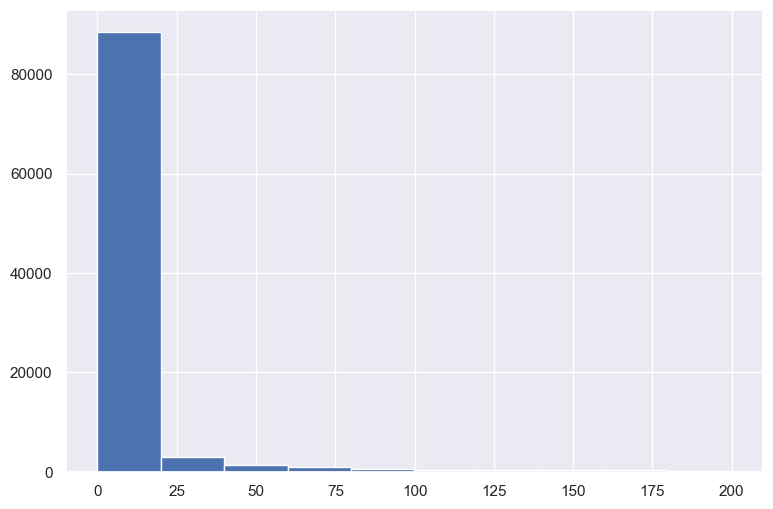

In [24]:
gap_data[gap_data < 200].hist()

In [25]:
gap_data.quantile(0.90)

18.325995370370403

In [26]:
events_data.groupby('user_id')['day'].nunique().idxmax()


1046

In [27]:
user_scores.sort_values(by='correct', ascending=False).head()



submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42


<AxesSubplot:xlabel='user_id', ylabel='correct'>

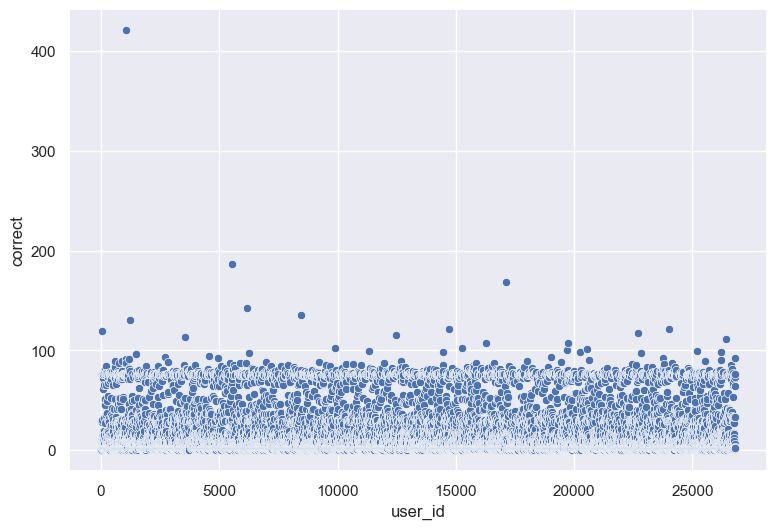

In [29]:
sns.scatterplot(data=user_scores['correct'], y=user_scores['correct'], x=user_scores['user_id'])

In [70]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [71]:
users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})

In [72]:
now = 1526772811
drop_out_threshold = 24 * 60 * 60 * 30

In [73]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [74]:
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [75]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [76]:
users_data = users_data.merge(user_scores, on='user_id',how='outer')

In [77]:
users_data = users_data.fillna(0)

In [80]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [83]:
users_data = users_data.merge(users_events_data, how='outer')

In [84]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [88]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [89]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [90]:
users_data = users_data.merge(users_days, how='outer')

In [91]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [92]:
users_data.user_id.nunique()

19234

In [93]:
users_data['passed_course'] = users_data.passed > 170

In [94]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [95]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [3]:
import math as m

In [4]:
E_sh_sob=(1/1)*m.log2((1/1)) - 0
E_sh_kot=-(4/9)*m.log2((4/9)) - (5/9)*m.log2((5/9))
E_gav_sob=0 - (5/5)*m.log2((5/5))
E_gav_kot=-(4/5)*m.log2((4/5)) - (1/5)*m.log2((1/5))
E_laz_sob=0 - (6/6)*m.log2((6/6))
E_laz_kot=-(4/4)*m.log2((4/4)) - 0

In [10]:
E_laz_kot

-0.0

In [29]:
E = - (4/10)*m.log2((4/10)) - (6/10)*m.log2((6/10))

In [30]:
E

0.9709505944546686

In [18]:
E - (9/10)*0.99

0.07995059445466857

In [19]:
E - (5/10)*0.72

0.6109505944546686

In [31]:

print(E - (1/10)*E_sh_sob - (9/10)*E_sh_kot)
print(E - (5/10)*E_gav_sob - (5/10)*E_gav_kot)
print(E - (6/10)*E_laz_sob - (6/10)*E_laz_kot)

0.07898214060026854
0.6099865470109874
0.9709505944546686


In [32]:
E

0.9709505944546686